In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# FUNCTIONS

In [2]:
# def impute_missing_values_with_random_forest(df_energy, column_name):
#     # Select only numerical columns (excluding the target column)
#     numerical_columns = df_energy.select_dtypes(include=['int64', 'float64']).columns.tolist()
#     if column_name in numerical_columns:
#         numerical_columns.remove(column_name)

#     # Exclude columns with NaN values
#     numerical_columns = [col for col in numerical_columns if not df_energy[col].isna().any()]

#     # Splitting the data into two parts: one where target column is missing and one where it's not
#     df_energy_with_target = df_energy[df_energy[column_name].notna()] #the target column is not NaN: These rows provide 
#                         # valuable information because they contain actual data that the model can learn from
#     df_energy_without_target = df_energy[df_energy[column_name].isna()] #rows where the target column is NaN and needs to be imputed 
#                                 # (using the information from the rows where the target column is not empty.)

#     # Prepare the features (X) and target (y) using only numerical columns
#     x = df_energy_with_target[numerical_columns]
#     y = df_energy_with_target[column_name]

#     # Create and train the model
#     model = RandomForestClassifier(random_state=42)
#     model.fit(x, y)

#     # Predicting the missing values
#     predicted_values = model.predict(df_energy_without_target[numerical_columns])

#     # Fill in the missing values in the original DataFrame
#     df_energy.loc[df_energy[column_name].isna(), column_name] = predicted_values
#     return df_energy

# READ DATASET AND DEFINE FEATURES

REMEMBER: specify that the time column contains a datetime, because it ensures that the plotting library interprets the data correctly and allows for more meaningful and accurate visualizations

In [3]:
df_energy = pd.read_csv('dataset/energy_dataset.csv')
df_energy['time'] = pd.to_datetime(df_energy['time'])

**COLUMNS**
1. **time:** The timestamp indicating the specific hour for which the data is recorded.

2. **generation biomass:** The amount of electricity generated from biomass sources (measured in MW).

3. **generation fossil brown coal/lignite:** The amount of electricity generated from brown coal or lignite sources (measured in MW).

4. **generation fossil coal-derived gas:** The amount of electricity generated from gas derived from coal (measured in MW).

5. **generation fossil gas:** The amount of electricity generated from natural gas (measured in MW).

6. **generation fossil hard coal:** The amount of electricity generated from hard coal (measured in MW).

7. **generation fossil oil:** The amount of electricity generated from oil (measured in MW).

8. **generation fossil oil shale:** The amount of electricity generated from oil shale (measured in MW).

9. **generation fossil peat:** The amount of electricity generated from peat (measured in MW).

10. **generation geothermal:** The amount of electricity generated from geothermal sources (measured in MW).

11. **generation hydro pumped storage aggregated:** The total amount of electricity generated from pumped hydro storage (measured in MW).

12. **generation hydro pumped storage consumption:** The amount of electricity consumed to pump water back into storage for hydro pumped storage systems (measured in MW).

13. **generation hydro run-of-river and poundage:** The amount of electricity generated from run-of-river and poundage hydro sources (measured in MW).

14. **generation hydro water reservoir:** The amount of electricity generated from hydro reservoirs (measured in MW).

15. **generation marine:** The amount of electricity generated from marine sources (e.g., tidal or wave energy) (measured in MW).

16. **generation nuclear:** The amount of electricity generated from nuclear sources (measured in MW).

17. **generation other:** The amount of electricity generated from other unspecified sources (measured in MW).

18. **generation other renewable:** The amount of electricity generated from other renewable sources not specifically categorized (measured in MW).

19. **generation solar:** The amount of electricity generated from solar power (measured in MW).

20. **generation waste:** The amount of electricity generated from waste-to-energy processes (measured in MW).

21. **generation wind offshore:** The amount of electricity generated from offshore wind turbines (measured in MW).

22. **generation wind onshore:** The amount of electricity generated from onshore wind turbines (measured in MW).

23. **forecast solar day ahead:** The forecasted amount of electricity generation from solar power for the following day (measured in MW).

24. **forecast wind offshore day ahead:** The forecasted amount of electricity generation from offshore wind turbines for the following day (measured in MW).

25. **forecast wind onshore day ahead:** The forecasted amount of electricity generation from onshore wind turbines for the following day (measured in MW).

26. **total load forecast:** The forecasted total electrical load (demand) for the specified hour (measured in MW).

27. **total load actual:** The actual total electrical load (demand) for the specified hour (measured in MW).

28. **price day ahead:** The forecasted electricity price for the following day (measured in EUR/MWh).

29. **price actual:** The actual electricity price for the specified hour (measured in EUR/MWh).

In [1]:
#df_energy

In [3]:
#df_energy.info()

In [2]:
#df_energy.isnull().sum()

# EDA

In order to not lose original data, we copy our dataframe to the variable copy_df_energy and we'll continue to work with df_energy variable.

In [7]:
copy_df_energy = df_energy.copy()

In [8]:
# copy_df_energy.info()

In [9]:
# copy_df_energy.isnull().sum()

In [10]:
# df_energy.hist(figsize=(18,16))

##  CLEANING DATASET AND HANDLING NULL VALUES

We decided to drop some column because there is no collected data in them and they are variables that we cannot fill by ourself because they must be collected with a "tool": 
1. generation hydro pumped storage aggregated 
2. forecast wind offshore eday ahead

In [11]:
df_energy = df_energy.drop(columns=['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead'])

In [5]:
#df_energy.info()

## Correlation

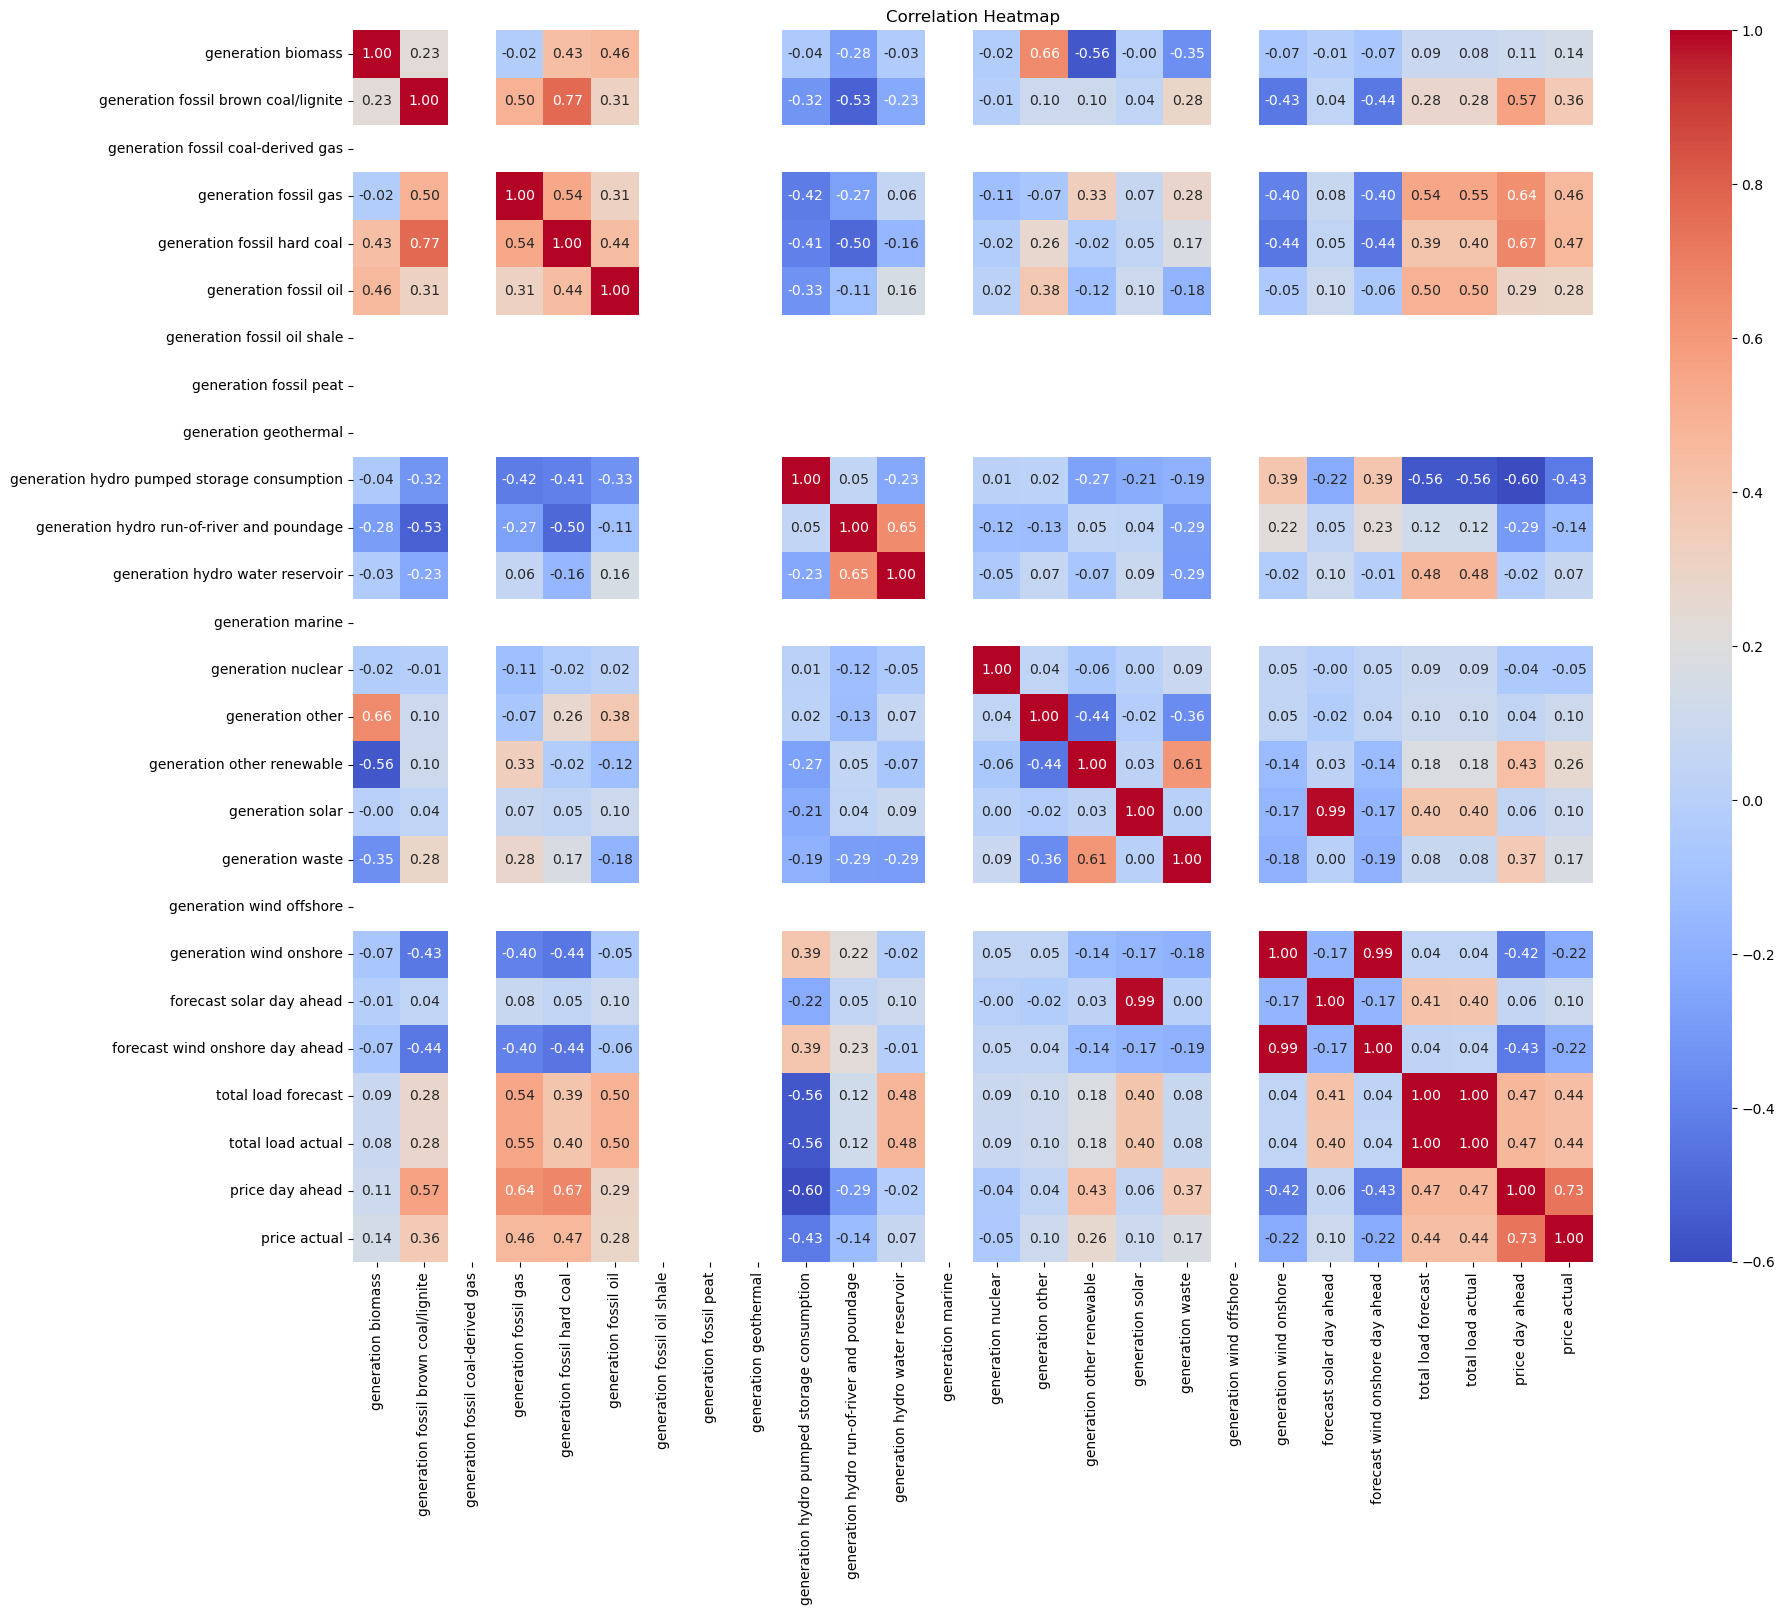

In [13]:
energy_corr = df_energy.drop(columns=['time'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [6]:
#df_energy.info()

We decided to drop features that have not correlation with any of other features, so they useless for our analysis.
1. 'generation fossil coal-derived gas'
2. 'generation fossil oil shale', 
3. 'generation fossil peat', 
4. 'generation geothermal', 
6. 'generation marine', 
7. 'generation wind offshore', 

We decided to drop features that have a high correlation with other features, so they useless for our analysis:
- 'forecast wind onshore day ahead'
- 'forecast solar day ahead',
- 'total load forecast'

bc its overfitting : we can see it from correlation matrix that its 100% correlated to the total load actual 

In [15]:
df_energy=df_energy.drop(['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 'generation marine', 
                            'generation wind offshore', 
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead'], 
                            axis=1)

In [7]:
#df_energy.info()

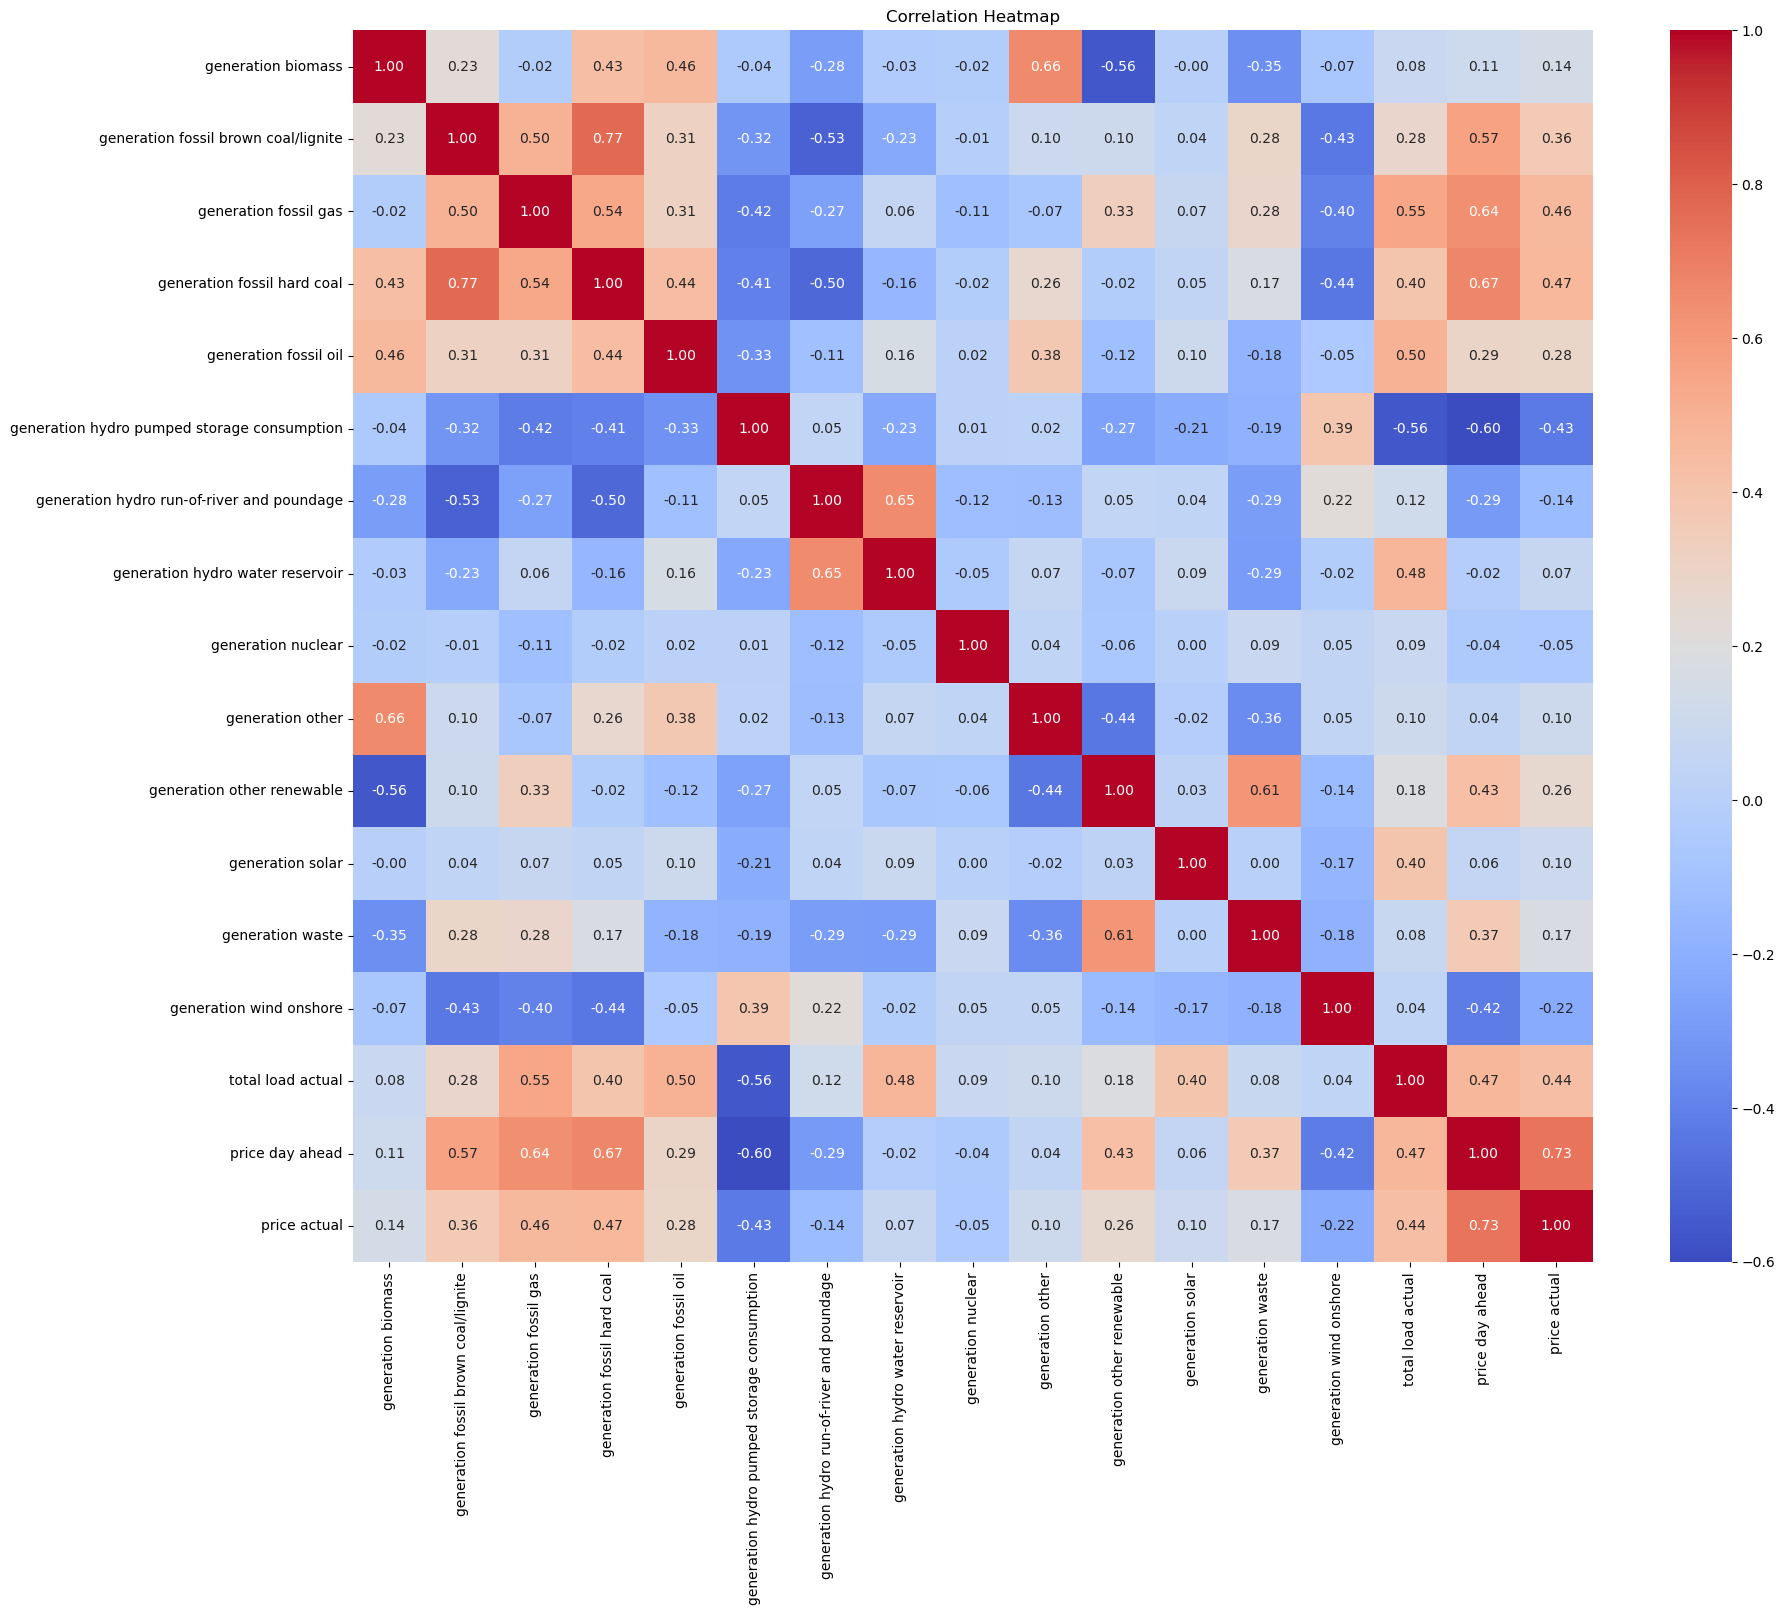

In [17]:
energy_corr = df_energy.drop(columns=['time'])
corr_energy = energy_corr.corr()

plt.figure(figsize=(20, 16))
sns.heatmap(corr_energy, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## PLOTS

Correlation of prices with other features. Prices are influenced mostly by: 
- *generation fossil brown coal/lignite* 
- *generation fossil gas*
- *generation fossil hard coal* 

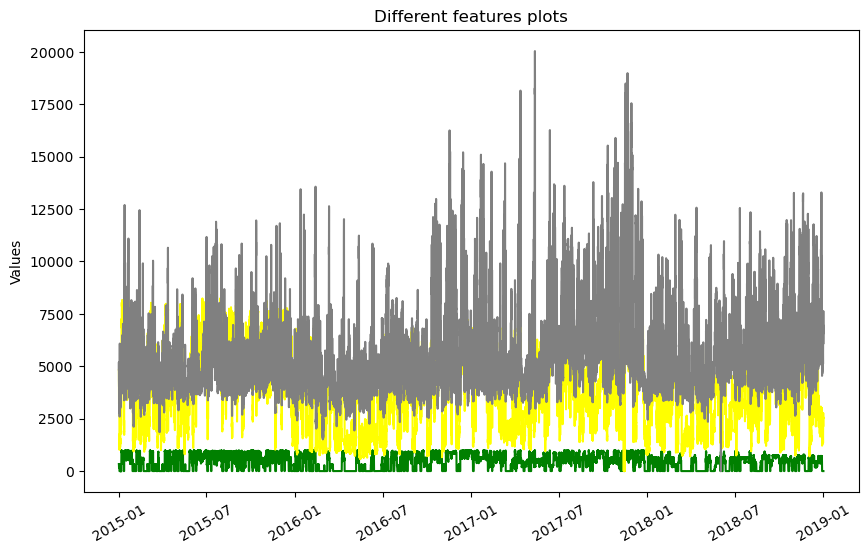

In [18]:
plt.figure(figsize=(10,6))
plt.plot(df_energy['time'], df_energy['generation fossil brown coal/lignite'], label='generation fossil brown coal/lignite', color='green')
plt.plot(df_energy['time'], df_energy['generation fossil hard coal'], label='generation fossil hard coal', color='yellow')
plt.plot(df_energy['time'], df_energy['generation fossil gas'], label='generation fossil gas', color='grey')
#plt.plot(df_energy['time'], df_energy['price day ahead'], label='price day ahead', color='red')
# plt.xlabel('Time')
plt.ylabel("Values")
plt.title('Different features plots')
plt.xticks(rotation=30)
plt.show()

Plotting positively correlated features, such as *total load actual*, *price day ahead*, *price actual*

Plotting positively correlated features, such as *generation fossil brown coal/lignite* , *generation fossil hard coal* , *generation fossil gas* , *generation fossil oil*.



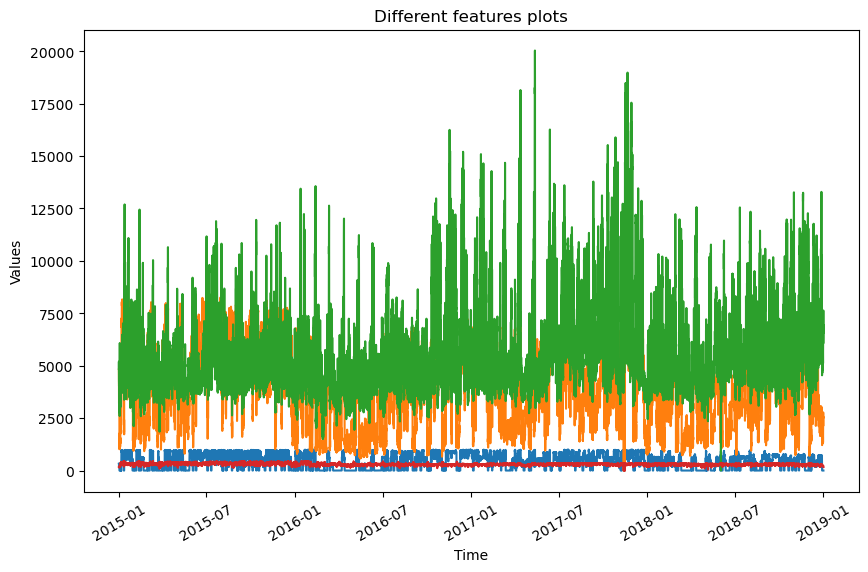

In [19]:
plt.figure(figsize=(10,6))
plt.plot(df_energy['time'], df_energy['generation fossil brown coal/lignite'], label='generation fossil brown coal/lignite')
plt.plot(df_energy['time'], df_energy['generation fossil hard coal'], label='generation fossil hard coal')
plt.plot(df_energy['time'], df_energy['generation fossil gas'], label='generation fossil gas')
plt.plot(df_energy['time'], df_energy['generation fossil oil'], label='generation fossil oil')
plt.xlabel('Time')
plt.ylabel("Values")
plt.title('Different features plots')
plt.xticks(rotation=30)
plt.show()

In [20]:
df_energy

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0,38.41,56.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 19:00:00+01:00,297.0,0.0,7634.0,2628.0,178.0,1.0,1135.0,4836.0,6073.0,63.0,95.0,85.0,277.0,3113.0,30653.0,68.85,77.02
35060,2018-12-31 20:00:00+01:00,296.0,0.0,7241.0,2566.0,174.0,1.0,1172.0,3931.0,6074.0,62.0,95.0,33.0,280.0,3288.0,29735.0,68.40,76.16
35061,2018-12-31 21:00:00+01:00,292.0,0.0,7025.0,2422.0,168.0,50.0,1148.0,2831.0,6076.0,61.0,94.0,31.0,286.0,3503.0,28071.0,66.88,74.30
35062,2018-12-31 22:00:00+01:00,293.0,0.0,6562.0,2293.0,163.0,108.0,1128.0,2068.0,6075.0,61.0,93.0,31.0,287.0,3586.0,25801.0,63.93,69.89


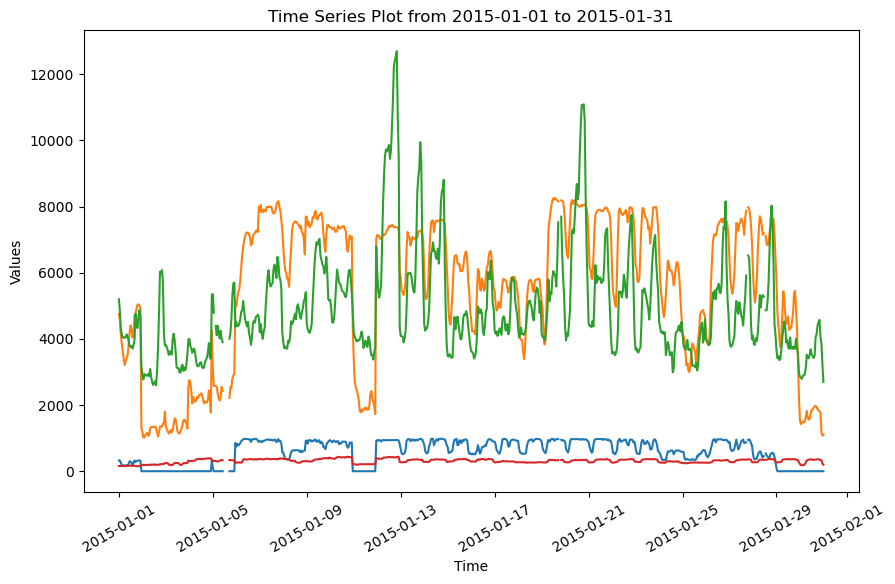

In [21]:
df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True)
# Define the date range
start_date = '2015-01-01'
end_date = '2015-01-31'

# Filter the data for the date range
mask = (df_energy['time'] >= start_date) & (df_energy['time'] <= end_date)
filtered_df_energy = df_energy.loc[mask]


plt.figure(figsize=(10,6))
plt.plot(filtered_df_energy['time'], filtered_df_energy['generation fossil brown coal/lignite'], label='generation fossil brown coal/lignite')
plt.plot(filtered_df_energy['time'], filtered_df_energy['generation fossil hard coal'], label='generation fossil hard coal')
plt.plot(filtered_df_energy['time'], filtered_df_energy['generation fossil gas'], label='generation fossil gas')
plt.plot(filtered_df_energy['time'], filtered_df_energy['generation fossil oil'], label='generation fossil oil')
plt.xlabel('Time')
plt.ylabel("Values")
plt.title('Time Series Plot from {} to {}'.format(start_date, end_date))
plt.xticks(rotation=30)
plt.show()

In [22]:
# pd.plotting.lag_plot(df_energy['total load actual'])
# pd.plotting.lag_plot(df_energy['total load actual'])
# plt.title('Lag Plot of Total Load Actual')
# plt.show()

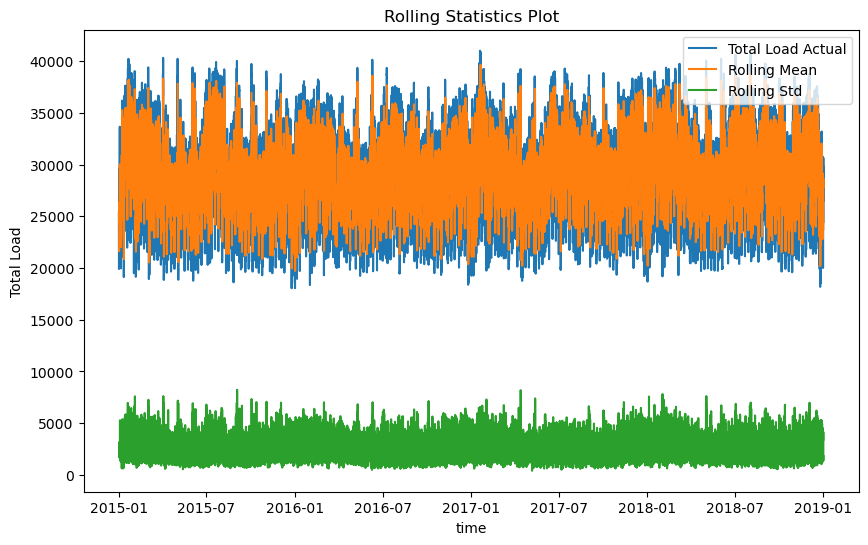

In [23]:
#  Show rolling mean and rolling standard deviation to examine the variability over time.

rolling_window = 12  # Example for a rolling window of 12 periods
df_energy['rolling_mean'] = df_energy['total load actual'].rolling(window=rolling_window).mean()
df_energy['rolling_std'] = df_energy['total load actual'].rolling(window=rolling_window).std()

plt.figure(figsize=(10, 6))
plt.plot(df_energy['time'], df_energy['total load actual'], label='Total Load Actual')
plt.plot(df_energy['time'], df_energy['rolling_mean'], label='Rolling Mean')
plt.plot(df_energy['time'], df_energy['rolling_std'], label='Rolling Std')
plt.xlabel('time')
plt.ylabel('Total Load')
plt.title('Rolling Statistics Plot')
plt.legend()
plt.show()

# MODEL 